<a href="https://colab.research.google.com/github/Raghuramas94/PROJECT-1/blob/master/THIRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras


Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


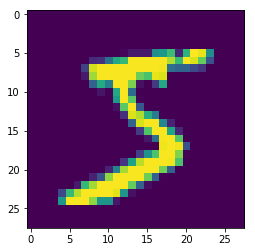

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(20, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())


model.add(Convolution2D(15, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(20, 3, 3, activation='relu')) # 9
model.add(Dropout(0.1))

#model.add(MaxPooling2D(pool_size=(2, 2))) # 10

model.add(Convolution2D(15, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu')) #9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 20)        80        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 15)        2715      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 15)        60        
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 10)        1360      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 10)        40        
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.1894 - acc: 0.9412
Epoch 2/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.0657 - acc: 0.9794
Epoch 3/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0520 - acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0469 - acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0422 - acc: 0.9870
Epoch 6/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0378 - acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.0331 - acc: 0.9893
Epoch 8/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0339 - acc: 0.9890
Epoch 9/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.0311 - acc: 0.9898
Epoch 10/10
60000/60000 [==============================] - 20s 326us/step - loss: 

In [26]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=20, verbose=1)

Epoch 1/20
 2560/60000 [>.............................] - ETA: 3s - loss: 0.0197 - acc: 0.9930

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 4s 61us/step - loss: 0.0183 - acc: 0.9941
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0164 - acc: 0.9949
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0162 - acc: 0.9949
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0153 - acc: 0.9951
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0144 - acc: 0.9953
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0141 - acc: 0.9956
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0139 - acc: 0.9953
Epoch 8/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0143 - acc: 0.9956
Epoch 9/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0139 - acc: 0.9954
Epoch 10/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0136 - acc: 0.9954
Epoch 11/2

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print(score)

[0.020516871280319173, 0.9944]


In [0]:
y_pred = model.predict(X_test)

In [30]:
print(y_pred[:9])
print(y_test[:9])

[[3.49835248e-16 1.46360257e-12 3.92326216e-09 2.73005757e-10
  5.87903885e-14 2.05432595e-15 1.20600697e-19 1.00000000e+00
  1.88627059e-15 7.85090673e-11]
 [7.98274982e-07 2.81455812e-07 9.99998808e-01 2.58956467e-10
  1.03153028e-10 1.13733643e-12 9.36412121e-08 4.21412594e-09
  4.86260054e-09 1.16062826e-10]
 [5.12302388e-11 9.99999523e-01 5.09253795e-08 2.83277291e-10
  1.33540283e-07 2.16701128e-08 8.61752909e-08 1.34607276e-07
  8.54019344e-09 5.14508400e-08]
 [9.99987960e-01 1.42072942e-12 1.83484843e-07 5.30295322e-11
  2.72351836e-10 5.03413666e-09 1.17123727e-05 1.17459964e-09
  4.10270644e-08 1.34528207e-07]
 [2.73071871e-10 6.54021726e-10 1.06394549e-09 8.36908251e-11
  9.99996185e-01 6.07547079e-09 9.40406039e-07 2.26250840e-09
  1.72107235e-08 2.78772382e-06]
 [5.01936062e-11 9.99992609e-01 6.20897822e-08 7.86480187e-11
  5.79463119e-07 1.01728848e-09 4.67578225e-08 6.57382452e-06
  2.66728222e-08 1.12646013e-07]
 [3.36893273e-16 4.92923995e-08 2.33703612e-11 3.54810278e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

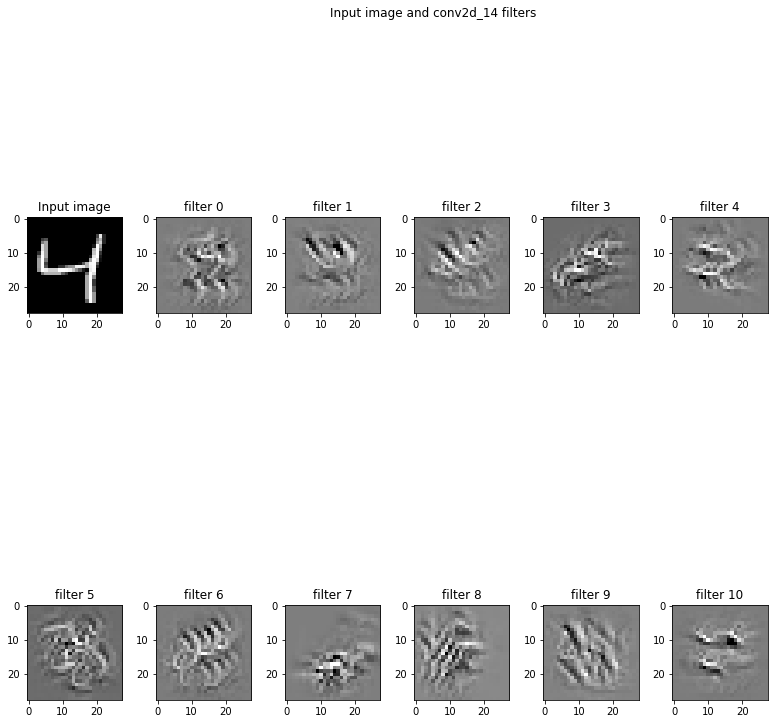

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

#SUMMARY

This code has been modified with a few enhancements to the previous code. The second code in this series was implented using BatchNormalization and Dropout. However, these could not provide the desired accuracy, as the model was overfitting when trained on the given batch size. The model was not overfitting when trained on the initial set of 10 epochs but was overfitting on the next set of 20 epochs. In order to reduce this effect, the Dropout has been added after every convolution operation. This reduces the effect of overfitting when trained on a large number of epochs and reduces the difference between the training and test error.
Another enhancement in this code is the introduction of a large batch size. It was observed in the previous code that the enhancements were not working as desired because of the small batch size, as there were not enough images to be read in one batch. As we are working on MNIST dataset, the batch size has been increased in the second fit function to 256, so that there are enough images to be trained on in each iteration. 
Increasing the batch size to a big number like 256 generally results in overfitting and the model stops learning after a certain stage. However, this effect is reduced by introducing Dropout at every stage of the convolution operation.
This has resulted in an accuracy of 99.44.
